# Minor Project

## Importing Libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe = pd.read_csv('used_car_dataset.csv')

In [3]:
dataframe.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [4]:
dataframe.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [5]:
dataframe.isnull().sum().sum()

0

In [6]:
dataframe.duplicated().sum()

92

In [7]:
dataframe.shape

(2105, 6)

In [8]:
dataframe.drop_duplicates(inplace=True)

In [9]:
dataframe.shape

(2013, 6)

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2013 non-null   object
 1   car_price_in_rupees  2013 non-null   object
 2   kms_driven           2013 non-null   object
 3   fuel_type            2013 non-null   object
 4   city                 2013 non-null   object
 5   year_of_manufacture  2013 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 110.1+ KB


In [11]:
dataframe.describe()

,year_of_manufacture
count,2013.000000
mean,2017.023845
std,2.823402
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


## Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
dataframe['car_name']=encoder.fit_transform(dataframe['car_name'])

In [14]:
dataframe.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,495,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,830,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,559,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,383,₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [15]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].apply(lambda x:x.split('₹')[1])

In [16]:
dataframe.head(2)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,495,2.93 Lakh,"10,344 km",Petrol,Kolkata,2019


In [17]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].str.replace(' Lakh','000')

In [18]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].str.replace(' Crore','00000')

In [19]:
dataframe.head(2)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,4.45000,"22,402 km",Petrol,Mumbai,2016
1,495,2.93000,"10,344 km",Petrol,Kolkata,2019


In [20]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].str.replace('.','')

In [21]:
dataframe.head(2)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,"22,402 km",Petrol,Mumbai,2016
1,495,293000,"10,344 km",Petrol,Kolkata,2019


In [22]:
dataframe['kms_driven'] = dataframe['kms_driven'].str.split(' ').str[0]

In [23]:
dataframe.head(2)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,"22,402",Petrol,Mumbai,2016
1,495,293000,"10,344",Petrol,Kolkata,2019


In [24]:
dataframe['kms_driven'] = dataframe['kms_driven'].str.replace(',','')

In [25]:
dataframe.head(2)

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,22402,Petrol,Mumbai,2016
1,495,293000,10344,Petrol,Kolkata,2019


## Other Attribute Selection and Preprocessing

In [26]:
dataframe['year_of_manufacture'].unique()

array([2016, 2019, 2021, 2017, 2013, 2018, 2007, 2022, 2014, 2020, 2015,
       2009, 2011, 2010, 2012, 2008, 2006, 2004, 2005], dtype=int64)

In [27]:
dataframe['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [28]:
dataframe['city'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Pallikarnai', 'Hyderabad', 'Pune', 'Gurgaon', 'Delhi', 'Noida',
       'Faridabad', 'Thiruvallur', 'Ambattur', 'Poonamallee'],
      dtype=object)

In [29]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].str.strip()

In [30]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].str.replace(',','')

In [31]:
dataframe.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,22402,Petrol,Mumbai,2016
1,495,293000,10344,Petrol,Kolkata,2019
2,830,2249000,12999,Diesel,Bangalore,2021
3,559,695000,45000,Petrol,Thane,2016
4,383,12000,11193,Petrol,Kolkata,2019


In [32]:
dataframe.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,22402,Petrol,Mumbai,2016
1,495,293000,10344,Petrol,Kolkata,2019
2,830,2249000,12999,Diesel,Bangalore,2021
3,559,695000,45000,Petrol,Thane,2016
4,383,12000,11193,Petrol,Kolkata,2019


In [33]:
dataframe['car_price_in_rupees'] = dataframe['car_price_in_rupees'].astype('int')
dataframe['kms_driven'] = dataframe['kms_driven'].astype(int)

In [34]:
dataframe.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,22402,Petrol,Mumbai,2016
1,495,293000,10344,Petrol,Kolkata,2019
2,830,2249000,12999,Diesel,Bangalore,2021
3,559,695000,45000,Petrol,Thane,2016
4,383,12000,11193,Petrol,Kolkata,2019


In [35]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2013 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2013 non-null   int32 
 1   car_price_in_rupees  2013 non-null   int32 
 2   kms_driven           2013 non-null   int32 
 3   fuel_type            2013 non-null   object
 4   city                 2013 non-null   object
 5   year_of_manufacture  2013 non-null   int64 
dtypes: int32(3), int64(1), object(2)
memory usage: 86.5+ KB


## Visualization

In [36]:
import seaborn as sns

In [37]:
dataframe['fuel_type']=encoder.fit_transform(dataframe['fuel_type'])

In [38]:
dataframe['city']=encoder.fit_transform(dataframe['city'])

In [39]:
dataframe.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,276,445000,22402,6,9,2016
1,495,293000,10344,6,8,2019
2,830,2249000,12999,1,2,2021
3,559,695000,45000,6,14,2016
4,383,12000,11193,6,8,2019


<AxesSubplot:>

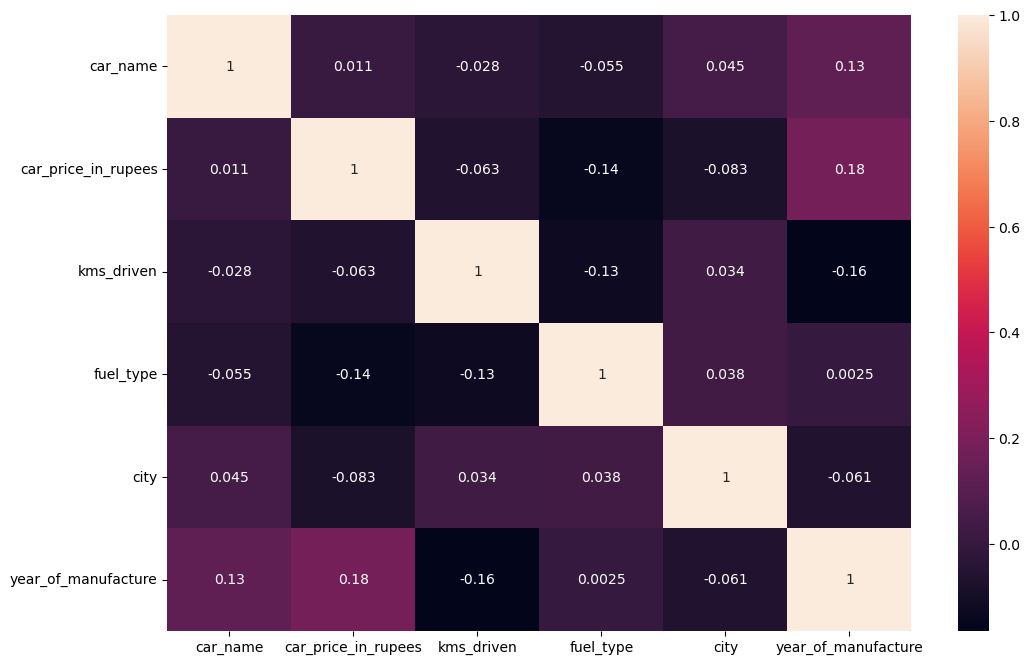

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
sns.heatmap(dataframe.corr(),annot=True)

In [41]:
dataframe.shape

(2013, 6)

In [42]:
dataframe.isna().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [43]:
dataframe[dataframe.duplicated()]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture


In [44]:
X = dataframe.drop(columns=['car_price_in_rupees'],axis=1)
y = dataframe[['car_price_in_rupees']]

In [45]:
X.head()

,car_name,kms_driven,fuel_type,city,year_of_manufacture
0,276,22402,6,9,2016
1,495,10344,6,8,2019
2,830,12999,1,2,2021
3,559,45000,6,14,2016
4,383,11193,6,8,2019


In [46]:
y.head()

,car_price_in_rupees
0,445000
1,293000
2,2249000
3,695000
4,12000


## Model Selection, Evaluation and Testing

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=0)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1509, 5), (504, 5), (1509, 1), (504, 1))

In [50]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
reg.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = reg.predict(X_test)

In [54]:
from sklearn.metrics import r2_score
print('Accuracy score is :',r2_score(y_test,y_pred))

Accuracy score is : 1.0000233677876624


In [55]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred = tree.predict(X_test)

In [57]:
print('Accuracy score is :',r2_score(y_test,y_pred))

Accuracy score is : 0.9996173983990616


In [58]:
nb.fit(X_train,y_train)

GaussianNB()

In [59]:
y_pred = nb.predict(X_test)

In [60]:
print('Accuracy score is :',r2_score(y_test,y_pred))

Accuracy score is : 0.9999681160577211
